<a href="https://colab.research.google.com/github/RayChen0623/RFM-Analysis/blob/master/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q linearmodels
!pip install -q mlxtend

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels import PanelOLS
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns 
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [0]:
from google.colab import files
files.upload()

Saving df_All_customer_Revenue.csv to df_All_customer_Revenue.csv


### Load Data

In [0]:
df = pd.read_csv('df_All_customer_Revenue.csv')
df.head()

,Unnamed: 0,NeighborID,TransactionID,TransDate,ItemID,one,brand,category,type,five,...,Quantity,Price,TotalSales,Discount,Cost,Freq_DM,DM_Blast_Email,DM_Targeted_Direct_mail,Freq_Email,Profits
0,0,21999,0217-021702-137864,2018-02-07 00:00:00,2003384,ALPO DOG TREATVARIETY SNAPS,Alpo,Dog,Treats,Grocery,...,1.0,3.28,2.48,0.8,2.15,0.0,0.0,0.0,0.0,0.33
1,1,25949,0016-001602-26517,2018-03-28 00:00:00,712240,SUNSEED QUICKOCLASSIC,Sunseed,Bird,Food,Package Food,...,1.0,8.98,8.98,0.0,3.48,0.0,0.0,0.0,0.0,5.50
2,2,46132,0074-007401-140568,2018-01-30 00:00:00,908497,PUPPERONI DOG TREATBACON LARGE,Pupperoni/Snausage,Dog,Treats,Grocery,...,1.0,11.98,7.98,4.0,8.58,0.0,0.0,0.0,0.0,-0.60
3,3,72984,4014-401401-68217,2018-01-08 00:00:00,879934,NUTRO DOG TREATCRUNCHY TREAT PNUT BUTTER,Nutro,Dog,Treats,Natural,...,1.0,4.98,4.98,0.0,2.68,0.0,0.0,0.0,0.0,2.30
4,4,458505,0153-015303-144502,2018-01-05 00:00:00,909786,WHISKAS CAT TREATTEMPTATION MEGA DAIRY,Whiskas,Cat,Treats,Grocery,...,1.0,3.68,3.68,0.0,2.43,0.0,0.0,0.0,0.0,1.25


In [0]:
len(df['one'].unique())

4342

In [0]:
df.iloc[1:,:].shape

(739989, 21)

In [0]:
files.upload()

In [0]:
df_RFM = pd.read_csv('rfm_seg.csv')
df_RFM.head()

,NeighborID,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,21999,67.200000,15,82.18,2,4,3,243
1,25949,52.333333,3,12.94,3,2,1,321
2,46132,98.400000,5,57.17,1,3,3,133
3,72984,144.000000,2,69.96,1,1,3,113
4,343012,130.000000,1,74.00,1,1,3,113


In [0]:
df_RFM.describe()

,NeighborID,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMScore
count,4.683190e+05,468319.000000,468319.000000,468319.000000,468319.000000,468319.000000,468319.000000,468319.000000
mean,9.589768e+06,65.297451,8.554285,77.549929,2.510808,2.422633,2.499777,277.806886
std,3.557698e+05,38.054950,27.101191,223.254581,1.119747,1.150204,1.118191,113.024911
min,2.199900e+04,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,9.315562e+06,35.000000,2.000000,20.000000,2.000000,1.000000,1.000000,211.000000
50%,9.555063e+06,62.000000,4.000000,43.540000,3.000000,2.000000,2.000000,311.000000
75%,9.684936e+06,93.000000,9.000000,91.780000,4.000000,3.000000,3.000000,411.000000
max,1.049372e+07,151.000000,6311.000000,77475.260000,4.000000,4.000000,4.000000,444.000000


In [0]:
df_RFM_Profits = pd.read_csv('rfm_seg_profit1.csv')
df_RFM_Profits.head()

,NeighborID,monetary_value,frequency,recency,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,21999,31.34,6,93.000000,2,3,3,233
1,25949,8.22,3,52.333333,3,2,1,321
2,46132,20.19,4,92.500000,2,2,3,223
3,72984,22.42,2,144.000000,1,1,3,113
4,343012,74.00,1,130.000000,1,1,4,114


In [0]:
df_RFM_Profits.describe()

,NeighborID,monetary_value,frequency,recency,R_Quartile,F_Quartile,M_Quartile,RFMScore
count,4.617870e+05,461787.000000,461787.000000,461787.000000,461787.000000,461787.00000,461787.000000,461787.000000
mean,9.589105e+06,33.461095,7.901920,65.311957,2.509822,2.36851,2.499960,277.167220
std,3.554440e+05,89.496779,23.697003,38.046923,1.119632,1.14582,1.118057,112.923351
min,2.199900e+04,0.010000,1.000000,1.000000,1.000000,1.00000,1.000000,111.000000
25%,9.315558e+06,8.660000,2.000000,35.000000,2.000000,1.00000,1.000000,211.000000
50%,9.554685e+06,18.680000,4.000000,62.000000,3.000000,2.00000,2.000000,311.000000
75%,9.684418e+06,39.650000,9.000000,93.000000,4.000000,3.00000,3.000000,411.000000
max,1.049372e+07,24887.820000,5438.000000,151.000000,4.000000,4.00000,4.000000,444.000000


In [0]:
df_RFM_M = df_RFM[(df_RFM.M_Quartile >= 4) & (df_RFM.F_Quartile >= 4)]

In [0]:
df_basket = df[df.NeighborID.isin(df_RFM_M['NeighborID'])]

In [0]:
df_basket.shape

(374927, 21)

In [0]:
df.columns

Index(['Unnamed: 0', 'NeighborID', 'TransactionID', 'TransDate', 'ItemID',
       'one', 'brand', 'category', 'type', 'five', 'six', 'Quantity', 'Price',
       'TotalSales', 'Discount', 'Cost', 'Freq_DM', 'DM_Blast_Email',
       'DM_Targeted_Direct_mail', 'Freq_Email', 'Profits'],
      dtype='object')

### Function

In [0]:
def thousandK(x, pos):
    if x > 0:
        return '%1.0fK' % (x / 1000)
    else:
        return 0

In [0]:
def thousand1000(x, pos):
    if x > 0:
        return '%1.0fK' % (x / 1000)
    else:
        return 0

In [0]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [0]:
formatter_K = FuncFormatter(thousandK)

In [0]:
formatter_1000 = FuncFormatter(thousand1000)

In [0]:
def F_Set(X):
  List = []
  List2 = []
  for a in X:
    List.append(list(a))
  for b in List:
    List2.append("".join(b))
  return List2

In [0]:
def F_Set2(X):
  List = []
  List2 = []
  for a in X:
    List.append(list(a))
  for b in List:
    List2.append(str(b).replace('[','').replace(']', '').replace("'",'').replace('"','')\
                 .replace("brand_", "").replace("category_", "").replace("type_", ""))
  return List2

In [0]:
def F_Set3(X):
    X1 = X.tolist()
    X2 = []
    for i in X1:
      X2.append(i.replace('[','').replace(']', '').replace("'",'').replace('"','')\
                 .replace("brand_", "").replace("category_", "").replace("type_", ""))
    return X2

## MBA Analysis


#### Brand




In [0]:
df_brand = df_basket[['NeighborID','brand']]
df_brand = pd.get_dummies(df_brand, columns = ['brand'])
df_brand = df_brand.groupby(['NeighborID']).sum()
df_brand = df_brand.applymap(encode_units)
frequent_itemsets_brand = apriori(df_brand, 
                                   min_support = 0.001, 
                                   use_colnames = True)
rules_brand = association_rules(frequent_itemsets_brand, 
                                 metric = "lift", 
                                 min_threshold = 1)

## Profits estimation

In [0]:
df_Test = df_basket[['NeighborID','brand','TotalSales']]

In [0]:
df_Test['brand'] = F_Set3(df_Test.brand)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_Test['brand2'] = df_Test.brand

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_Test = pd.get_dummies(df_Test, columns = ['brand'])

In [0]:
df_Test.head()

,NeighborID,TotalSales,brand2,brand_0,brand_9-Lives,brand_Acana,brand_Advantage,brand_Advantix,brand_All Star Dogs,brand_Alpo,...,brand_Whole Earth Farms,brand_Willow Creek,brand_World Wide,brand_Worlds Best,brand_Zignature,brand_Zilla,brand_Zodiac,brand_Zoo Med,brand_Zukes,brand_Zupreem
5,466255,3.98,Fm Brown,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,466255,74.98,Prevue,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,540054,13.19,Kong,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,540054,9.42,PS Plus,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,540054,10.98,Milkbone,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_Test.groupby('brand2')[['TotalSales']].mean()

,TotalSales
brand2,
0,2.884403
9-Lives,2.613107
Acana,63.965608
Advantage,48.661717
Advantix,53.332913
All Star Dogs,29.980000
Alpo,7.253004
American Farms,6.463529
Americas Favorite,9.562000


In [0]:
df_Test.merge(df_brand2, left_on='consequents', right_on='Brand', how='inner')

In [0]:
df_plot_brand

,antecedents,consequents,confidence
92,Aquarium Pharm,Tetra,0.58
132,Aqueon,Tetra,0.53
314,Blue Ribbon,Tetra,0.59
405,Carefresh,Kaytee,0.59
411,Carefresh,Super Pet,0.65
418,Carlson,PS Plus,0.56
709,Eight in one,Kaytee,0.64
751,Fluker Farms,Exo Terra,0.72
768,Mice to,Exo Terra,0.57
786,Zilla,Exo Terra,0.61


In [0]:
df_plot_brand.merge(df_brand2, left_on='consequents', right_on='Brand', how='inner')

In [0]:
df_Test.groupby('brand2').agg({'sum','mean'})

NeighborID               TotalSales                 \
                            mean           sum       mean            sum   
brand2                                                                     
0                   9.433606e+06   28442323297   2.884403    8696.475000   
9-Lives             9.265915e+06    1501078287   2.613107     423.323333   
Acana               9.368115e+06    5161831505  63.965608   35245.050000   
Advantage           9.550799e+06     945529067  48.661717    4817.510000   
Advantix            9.604329e+06     989245873  53.332913    5493.290000   
All Star Dogs       9.160351e+06       9160351  29.980000      29.980000   
Alpo                9.368577e+06    4272070956   7.253004    3307.370000   
America's Favorite  9.524910e+06     285747298   9.562000     286.860000   
American Farms      9.447985e+06     481847253   6.463529     329.640000   
Andis               9.638425e+06      28915274  19.236667      57.710000   
Angel Eyes          9.451815e+06     444235294  27.173191    1277.140000   
Aquarium Pharm      9.449902e+06   27650413040   7.767461   22727.590000   
Aquarium Systems    9.161076e+06       9161076   5.980000       5.980000   
Aquatic Creations   9.423124e+06     292116842   5.887419     182.510000   
Aqueon              9.435009e+06   45901320094  16.723175   81358.245000   
Arm & Hammer        9.428340e+06      37713362   9.480000      37.920000   
Aussie              9.288103e+06       9288103  12.650000      12.650000   
Avanti              9.439571e+06    1076111115   3.341053     380.880000   
Avoderm             9.163152e+06      45815761  11.416000      57.080000   
Bags on Board       9.445631e+06    3268188383  10.603324    3668.750000   
Barkworthies        9.437711e+06    7852175672  10.900727    9069.405000   
Bayer Expert Care   9.362866e+06     280885976  52.717667    1581.530000   
Benebone            9.417528e+06   14889112007  11.868567   18764.205000   
Beneful             9.382496e+06   16034685435  12.077080   20639.730000   
Bergan              9.523857e+06    5257168983  42.778134   23613.530000   
Best Friend         9.559370e+06      38237482   1.147500       4.590000   
Better Belly        9.396959e+06     685978041  12.245205     893.900000   
Bil Jac             9.419617e+06    1102095149   9.882821    1156.290000   
Bird                9.483343e+06     322433667  89.556765    3044.930000   
Bixbi               9.437255e+06    8776646867  11.018247   10246.970000   
...                          ...           ...        ...            ...   
True Leaf           9.452689e+06    3204461459  13.540944    4590.380000   
Tuckers             9.396578e+06    9471750686   7.522794    7582.976667   
Ultra               9.401726e+06    4061545812   6.665903    2879.670000   
Under the Sun       9.393632e+06     244234445  29.769231     774.000000   
Urthpet             9.511516e+06      19023032  17.980000      35.960000   
Van Ness            9.499619e+06    3087376208   4.749969    1543.740000   
Vets Best           9.531387e+06    1162829175  13.201557    1610.590000   
Victor              9.376591e+06     703244361  43.255467    3244.160000   
Vitakraft           9.435619e+06    3472307869   9.241114    3400.730000   
Vital               9.405617e+06    7242325315  11.128994    8569.325000   
Vital Planet        8.744432e+06     323543999  31.918108    1180.970000   
Wag & Bone          9.477697e+06    1033068949  11.196697    1220.440000   
Wagmore             9.401956e+06   10464376595   4.625494    5148.175000   
Wardley             9.417400e+06    1083001011   5.021217     577.440000   
Weco                9.458071e+06     520193882   4.872727     268.000000   
Wellness            9.399059e+06   14681329915  11.005781   17191.030000   
Weruva              9.406972e+06     903069343   1.739792     167.020000   
West Paw            9.170094e+06       9170094  11.710000      11.710000   
Whimzees            9.415036e+06    7108352298  15.664609   11826.7800

In [0]:
df_Test.reset_index().head()

,index,NeighborID,brand,TotalSales,brand2
0,5,466255,Fm Brown,3.98,Fm Brown
1,6,466255,Prevue,74.98,Prevue
2,12,540054,Kong,13.19,Kong
3,13,540054,PS Plus,9.42,PS Plus
4,14,540054,Milkbone,10.98,Milkbone


In [0]:
df_Test.reset_index().pivot(index = 'brand', columns = 'brand2', values = 'TotalSales')

ValueError: ignored

In [0]:
df_Test = pd.get_dummies(df_Test, columns = ['brand'])

In [0]:
df_Test.groupby(['TotalSales']).sum().reset_index()

,TotalSales,NeighborID,brand_0,brand_9-Lives,brand_Acana,brand_Advantage,brand_Advantix,brand_All Star Dogs,brand_Alpo,brand_America's Favorite,...,brand_Whole Earth Farms,brand_Willow Creek,brand_World Wide,brand_Worlds Best,brand_Zignature,brand_Zilla,brand_Zodiac,brand_Zoo Med,brand_Zukes,brand_Zupreem
0,-6.290000,9576106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5.310000,9167552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.890000,9570085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.750000,9502936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.620000,9548587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-3.340000,9211188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-3.040000,9134311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-2.330000,9205673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.860000,10070674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.585000,9502936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_brand2 = df_basket[['NeighborID','brand','TotalSales']]
df_brand2 = pd.get_dummies(df_brand2, columns = ['brand'])
df_brand2.columns = F_Set3(df_brand2.columns)
df_brand2 = df_brand2.iloc[:, 2:].apply(lambda x: (x * df_brand2.TotalSales).mean()).to_frame().T

In [0]:
df_brand2.sum()

0                    0.023195
9-Lives              0.001129
Acana                0.094005
Advantage            0.012849
Advantix             0.014652
All Star Dogs        0.000080
Alpo                 0.008821
Americas Favorite    0.000765
American Farms       0.000879
Andis                0.000154
Angel Eyes           0.003406
Aquarium Pharm       0.060619
Aquarium Systems     0.000016
Aquatic Creations    0.000487
Aqueon               0.216998
Arm & Hammer         0.000101
Aussie               0.000034
Avanti               0.001016
Avoderm              0.000152
Bags on Board        0.009785
Barkworthies         0.024190
Bayer Expert Care    0.004218
Benebone             0.050048
Beneful              0.055050
Bergan               0.062982
Best Friend          0.000012
Better Belly         0.002384
Bil Jac              0.003084
Bird                 0.008121
Bixbi                0.027331
                       ...   
True Leaf            0.012243
Tuckers              0.020225
Ultra     

In [0]:
df_brand2 = df_brand2.T
df_brand2 = df_brand2.reset_index()
df_brand2.columns = ['Brand','Sales']

In [0]:
df_brand2

,Brand,Sales
0,0,0.023195
1,9-Lives,0.001129
2,Acana,0.094005
3,Advantage,0.012849
4,Advantix,0.014652
5,All Star Dogs,0.000080
6,Alpo,0.008821
7,Americas Favorite,0.000765
8,American Farms,0.000879
9,Andis,0.000154


In [0]:
df_plot_brand_profits = df_plot_brand.merge(df_brand2, left_on='consequents', right_on='Brand', how='inner')

In [0]:
df_plot_brand_profits.head()

,antecedents,consequents,confidence,Brand,Sales
0,Aquarium Pharm,Tetra,0.58,Tetra,0.374861
1,Aqueon,Tetra,0.53,Tetra,0.374861
2,Blue Ribbon,Tetra,0.59,Tetra,0.374861
3,Fish,Tetra,0.57,Tetra,0.374861
4,Omega Sea,Tetra,0.53,Tetra,0.374861


In [0]:
df_plot_brand_profits['ES'] = df_plot_brand_profits.confidence * df_plot_brand_profits.Sales

In [0]:
df_plot_brand_profits.head()

,antecedents,consequents,confidence,Brand,Sales,ES
0,Aquarium Pharm,Tetra,0.58,Tetra,0.374861,0.217419
1,Aqueon,Tetra,0.53,Tetra,0.374861,0.198676
2,Blue Ribbon,Tetra,0.59,Tetra,0.374861,0.221168
3,Fish,Tetra,0.57,Tetra,0.374861,0.213671
4,Omega Sea,Tetra,0.53,Tetra,0.374861,0.198676


In [0]:
df_plot_brand_profits_p2 =  df_plot_brand_profits.sort_values(by = 'ES', ascending = False)

In [0]:
df_plot_brand_profits.groupby('antecedents').mean()['ES'].sum()

16.581482131877227

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


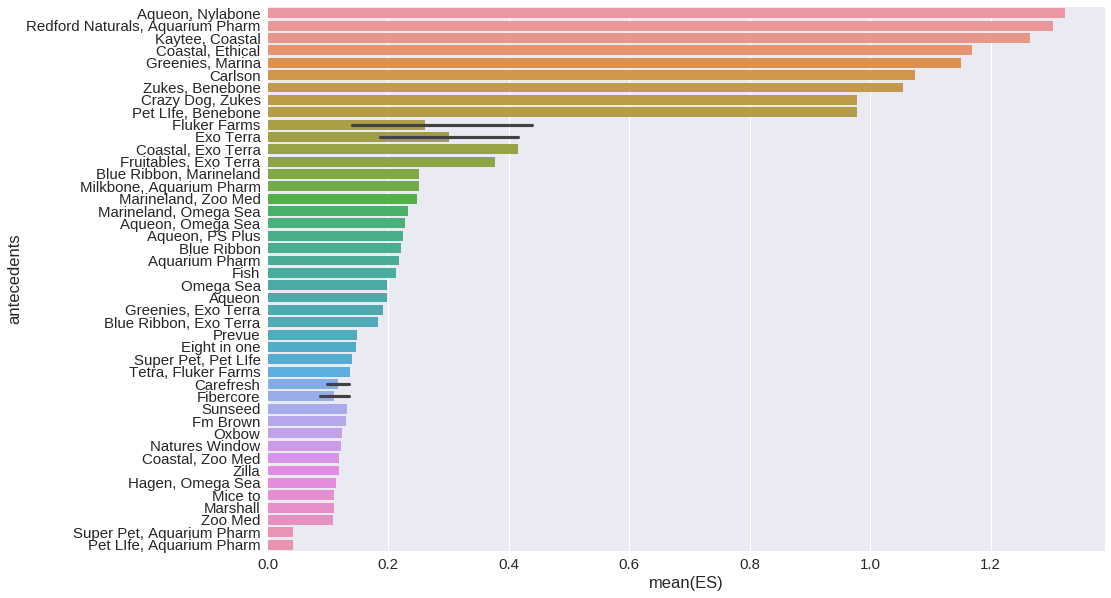

In [0]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'ES', y = 'antecedents', data = df_plot_brand_profits_p2);

## Revised it later

In [0]:
result_brand = rules_brand[(rules_brand['lift'] > 1) & (rules_brand['confidence'] > 0.1)]
result_brand.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(brand_0),(brand_Greenies),0.030746,0.082671,0.003306,0.107517,1.300534,0.000764,1.027839
22,(brand_0),(brand_Merrick),0.030746,0.082307,0.003152,0.102506,1.245402,0.000621,1.022505
25,(brand_0),(brand_Milkbone),0.030746,0.090011,0.003488,0.113440,1.260282,0.000720,1.026426
28,(brand_0),(brand_Nylabone),0.030746,0.122817,0.004875,0.158542,1.290885,0.001098,1.042457
32,(brand_0),(brand_PS Plus),0.030746,0.293482,0.009287,0.302050,1.029193,0.000263,1.012276


#### Sample

In [0]:
rules_brand2 = rules_brand[(rules_brand['lift'] > 1) & (rules_brand['confidence'] > 0.5) & 
            pd.Series(F_Set(result_brand['antecedents'])).isin(df_brand.columns)]

In [0]:
df_sample = rules_brand2[['antecedents', 'consequents', 'confidence']].sample(n = 5)
df_sample

,antecedents,consequents,confidence
1555,(brand_Marshall),(brand_Super Pet),0.721127
132,(brand_Aqueon),(brand_Tetra),0.531959
3863,"(brand_Zukes, brand_Benebone)",(brand_PS Plus),0.550661
830,(brand_Fish),(brand_Tetra),0.568226
1430,(brand_Sunseed),(brand_Kaytee),0.575323


In [0]:
df_sample['antecedents'] = F_Set2(df_sample['antecedents'])
df_sample['consequents'] = F_Set2(df_sample['consequents'])
df_sample['confidence']  = round(df_sample['confidence'], 2)

In [0]:
df_sample = df_sample.reset_index()[['antecedents', 'consequents', 'confidence']]

In [0]:
df_sample.columns = ['Antecedents', 'Consequents', 'Probability (%)']

In [0]:
df_sample

,Antecedents,Consequents,Probability (%)
0,Marshall,Super Pet,0.72
1,Aqueon,Tetra,0.53
2,"Zukes, Benebone",PS Plus,0.55
3,Fish,Tetra,0.57
4,Sunseed,Kaytee,0.58


#### end of sample

In [0]:
df_plot_brand = rules_brand2[['antecedents', 'consequents', 'confidence']]

In [0]:
df_plot_brand['antecedents'] = F_Set2(df_plot_brand['antecedents'])
df_plot_brand['consequents'] = F_Set2(df_plot_brand['consequents'])
df_plot_brand['confidence']  = round(df_plot_brand['confidence'], 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
df_plot_brand.head()

,antecedents,consequents,confidence
92,Aquarium Pharm,Tetra,0.58
132,Aqueon,Tetra,0.53
314,Blue Ribbon,Tetra,0.59
405,Carefresh,Kaytee,0.59
411,Carefresh,Super Pet,0.65


In [0]:
df_plot_brand[~df_plot_brand["antecedents"].str.contains(',')]

,antecedents,consequents,confidence
92,Aquarium Pharm,Tetra,0.58
132,Aqueon,Tetra,0.53
314,Blue Ribbon,Tetra,0.59
405,Carefresh,Kaytee,0.59
411,Carefresh,Super Pet,0.65
418,Carlson,PS Plus,0.56
709,Eight in one,Kaytee,0.64
751,Fluker Farms,Exo Terra,0.72
768,Mice to,Exo Terra,0.57
786,Zilla,Exo Terra,0.61


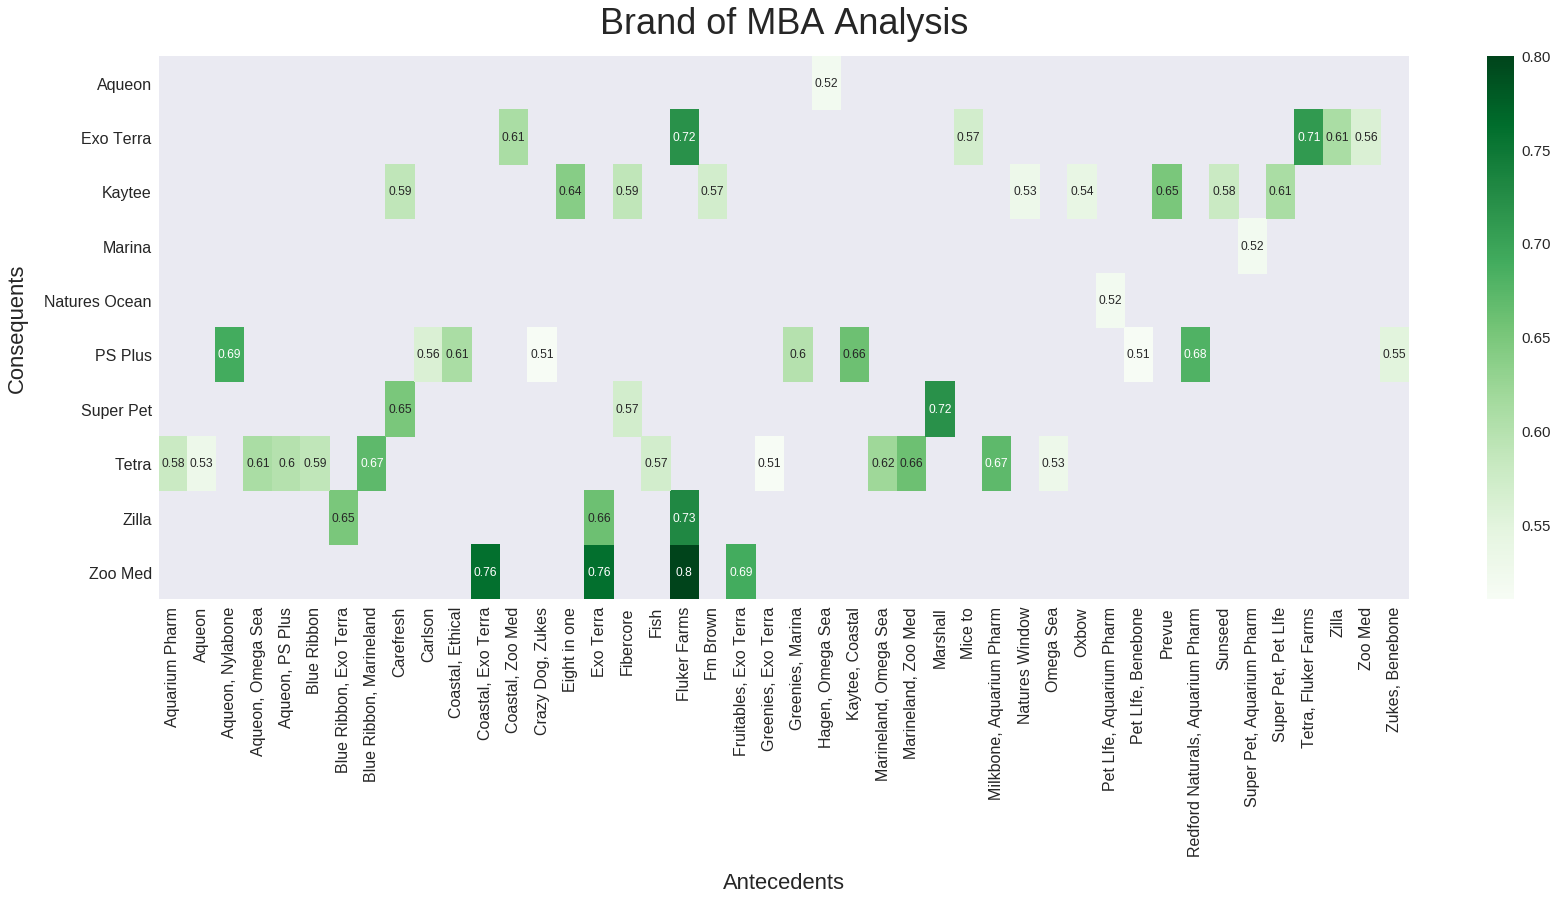

In [0]:
plt.figure(figsize = (28, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_plot_brand.reset_index().pivot(
    index = 'consequents', columns = 'antecedents', values = 'confidence'), annot = True,
            annot_kws = {"size": 12},  fmt = "g", cmap = 'Greens')
plt.title("Brand of MBA Analysis",
          y = 1.03, 
          fontsize = 36)
plt.xlabel("Antecedents", 
           labelpad = 16, 
           fontsize = 22)
plt.ylabel("Consequents", 
           labelpad = 16, 
           fontsize = 22)
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation = 0); 

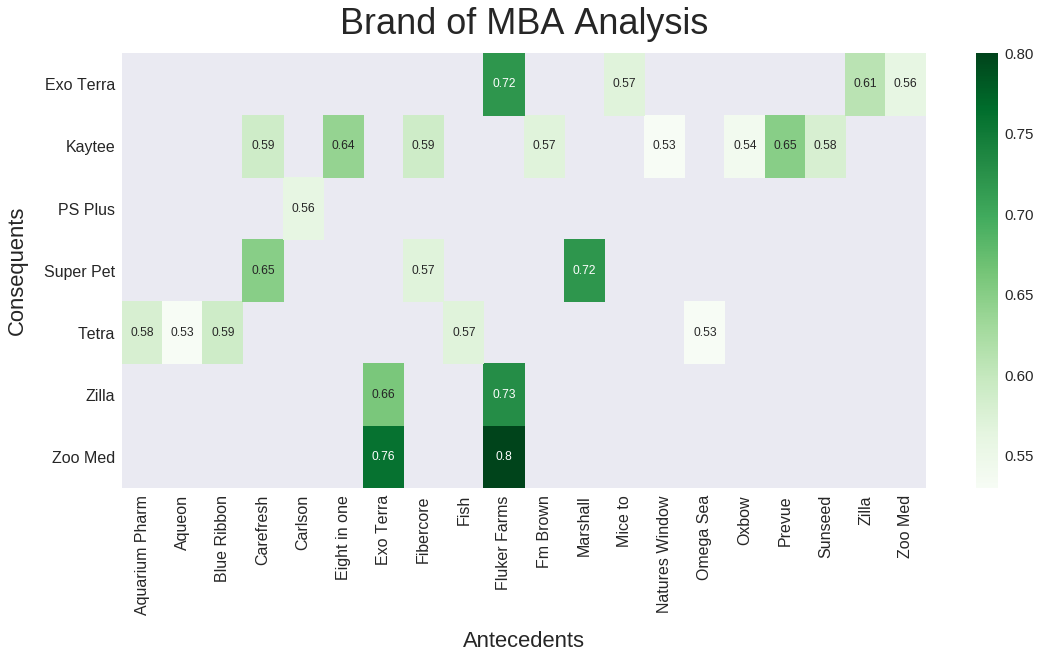

In [0]:
plt.figure(figsize = (18, 8))
sns.set(font_scale = 1.5)
sns.heatmap(df_plot_brand[~df_plot_brand["antecedents"].str.contains(',')].reset_index().pivot(
    index = 'consequents', columns = 'antecedents', values = 'confidence'), annot = True,
            annot_kws = {"size": 12},  fmt = "g", cmap = 'Greens')
plt.title("Brand of MBA Analysis",
          y = 1.03, 
          fontsize = 36)
plt.xlabel("Antecedents", 
           labelpad = 16, 
           fontsize = 22)
plt.ylabel("Consequents", 
           labelpad = 16, 
           fontsize = 22)
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation = 0); 

#### Category

In [0]:
df_Category = df_basket[['NeighborID','category']]
df_Category = pd.get_dummies(df_Category, columns = ['category'])
df_Category = df_Category.groupby(['NeighborID']).sum()
df_Category = df_Category.applymap(encode_units)
frequent_itemsets_category = apriori(df_Category, 
                                   min_support = 0.001, 
                                   use_colnames = True)
rules_category = association_rules(frequent_itemsets_category, 
                                 metric = "lift", 
                                 min_threshold = 1)

In [0]:
rules_category2 = rules_category[(rules_category['lift'] > 1) & (rules_category['confidence'] > 0.1) & 
            pd.Series(F_Set(rules_category['antecedents'])).isin(df_Category.columns)]

In [0]:
rules_category2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(category_Bird),(category_Fish),0.030508,0.143239,0.007830,0.256657,1.791809,0.003460,1.152579
2,(category_Bird),(category_Reptile),0.030508,0.091146,0.005757,0.188705,2.070364,0.002976,1.120251
4,(category_Bird),(category_Small Animal),0.030508,0.088330,0.008138,0.266758,3.020006,0.005443,1.243341
6,(category_Bird),(category_Wild Bird),0.030508,0.017299,0.004020,0.131772,7.617291,0.003492,1.131847
7,(category_Wild Bird),(category_Bird),0.017299,0.030508,0.004020,0.232389,7.617291,0.003492,1.262998
8,(category_Other),(category_Cat),0.009525,0.174210,0.001835,0.192647,1.105835,0.000176,1.022837
10,(category_Wild Bird),(category_Cat),0.017299,0.174210,0.005267,0.304453,1.747627,0.002253,1.187254
13,(category_Services),(category_Dog),0.002773,0.756888,0.002423,0.873737,1.154381,0.000324,1.925446
14,(category_Reptile),(category_Fish),0.091146,0.143239,0.034556,0.379130,2.646830,0.021500,1.379936
15,(category_Fish),(category_Reptile),0.143239,0.091146,0.034556,0.241248,2.646830,0.021500,1.197827


In [0]:
df_plot_cate = rules_category2[['antecedents', 'consequents', 'confidence']]

In [0]:
df_plot_cate['antecedents'] = F_Set2(df_plot_cate['antecedents'])
df_plot_cate['consequents'] = F_Set2(df_plot_cate['consequents'])
df_plot_cate['confidence']  = round(df_plot_cate['confidence'], 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

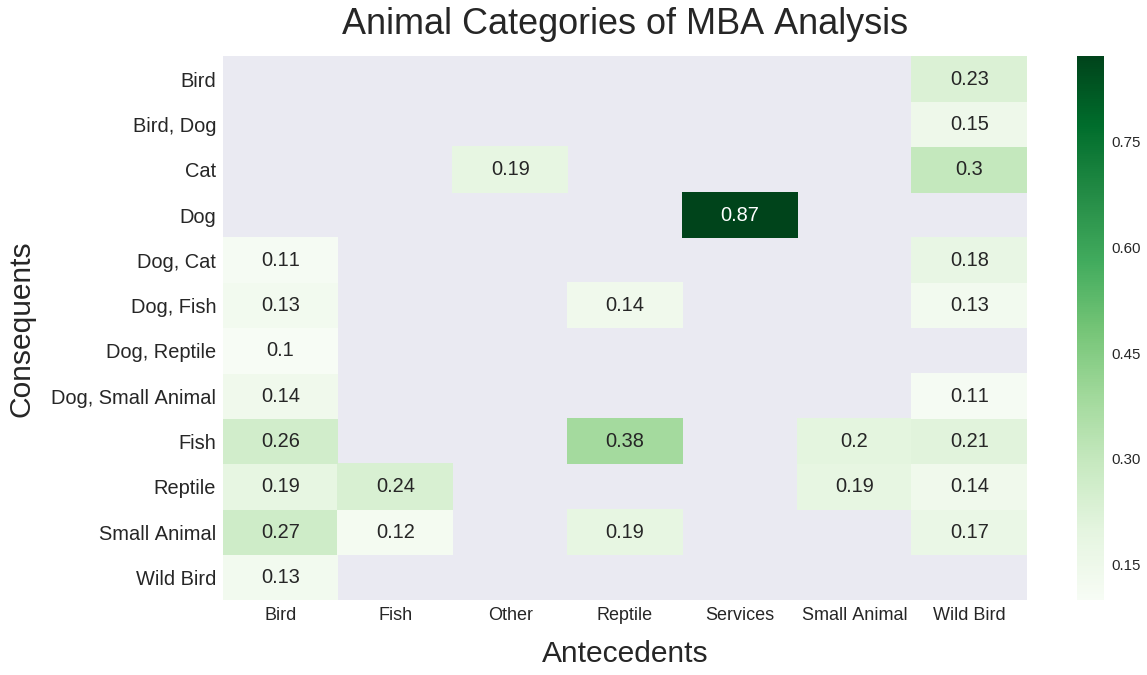

In [0]:
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_plot_cate.reset_index().pivot(
    index = 'consequents', columns = 'antecedents', values = 'confidence'), annot = True,
            annot_kws = {"size": 20},  fmt = "g", cmap = 'Greens')
plt.title("Animal Categories of MBA Analysis",
          y = 1.03, 
          fontsize = 36)
plt.xlabel("Antecedents", 
           labelpad = 16, 
           fontsize = 30)
plt.ylabel("Consequents", 
           labelpad = 16, 
           fontsize = 30)
plt.xticks(fontsize = 18, rotation = 0)
plt.yticks(fontsize = 20, rotation = 0); 

## ES

In [0]:
df_cato2 = df_basket[['NeighborID','category','TotalSales']]
df_cato2 = pd.get_dummies(df_cato2, columns = ['category'])
df_cato2.columns = F_Set3(df_cato2.columns)
df_cato2 = df_cato2.iloc[:, 2:].apply(lambda x: (x * df_cato2.TotalSales).sum()).to_frame().T

In [0]:
df_cato2 = df_cato2.T
df_cato2 = df_cato2.reset_index()
df_cato2.columns = ['category','Sales']

In [0]:
df_cato2

,category,Sales
0,Bird,9.079274e+04
1,Cat,2.909302e+05
2,Dog,2.867038e+06
3,Fish,4.699121e+05
4,Other,2.477300e+02
5,Reptile,4.138026e+05
6,Services,3.910890e+03
7,Small Animal,2.346187e+05
8,Wild Bird,2.554589e+04


In [0]:
df_plot_cate_profits = df_plot_cate.merge(df_cato2, left_on='consequents', right_on='category', how='inner')

In [0]:
df_plot_cate_profits['ES'] = df_plot_cate_profits.confidence * df_plot_cate_profits.Sales

In [0]:
df_plot_brand_profits.groupby('antecedents').mean()['ES'].sum()

6216845.351258333

## Same Time

#### Type

In [0]:
df_type = df_basket[['NeighborID','type']]
df_type = pd.get_dummies(df_type, columns = ['type'])
df_type = df_type.groupby(['NeighborID']).sum()
df_type = df_type.applymap(encode_units)
frequent_itemsets_type = apriori(df_type, 
                                   min_support = 0.001, 
                                   use_colnames = True)
rules_type = association_rules(frequent_itemsets_type, 
                                 metric = "lift", 
                                 min_threshold = 1)

In [0]:
rules_type2 = rules_type[(rules_type['lift'] > 1) & (rules_type['confidence'] > 0.5) & 
            pd.Series(F_Set(rules_type['antecedents'])).isin(df_type.columns)]

In [0]:
rules_type2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(type_Fashion),(type_Basics),0.020871,0.639408,0.013811,0.661745,1.034933,0.000466,1.066035
2,(type_Feeders),(type_Basics),0.003698,0.639408,0.003292,0.890152,1.392149,0.000927,3.282628
5,(type_Live),(type_Basics),0.019512,0.639408,0.017257,0.884422,1.383188,0.004781,3.119902
7,(type_Pet Owner Non Food),(type_Basics),0.010141,0.639408,0.006836,0.674033,1.054151,0.000351,1.106222
10,(type_Fashion),(type_Treats),0.020871,0.567116,0.012901,0.618121,1.089937,0.001065,1.133562
12,(type_Feeders),(type_Food),0.003698,0.508383,0.001933,0.522727,1.028215,0.000053,1.030054
15,(type_Litter),(type_Food),0.006177,0.508383,0.003614,0.585034,1.150773,0.000473,1.184715
17,(type_Live),(type_Food),0.019512,0.508383,0.014596,0.748026,1.471381,0.004676,1.951060
18,(type_Store Supplies),(type_Food),0.008320,0.508383,0.004384,0.526936,1.036493,0.000154,1.039218
20,(type_Grooming),(type_Treats),0.002773,0.567116,0.001807,0.651515,1.148821,0.000234,1.242188


In [0]:
df_plot_type = rules_type2[['antecedents', 'consequents', 'confidence']]

In [0]:
df_plot_type['antecedents'] = F_Set2(df_plot_type['antecedents'])
df_plot_type['consequents'] = F_Set2(df_plot_type['consequents'])
df_plot_type['confidence']  = round(df_plot_type['confidence'], 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

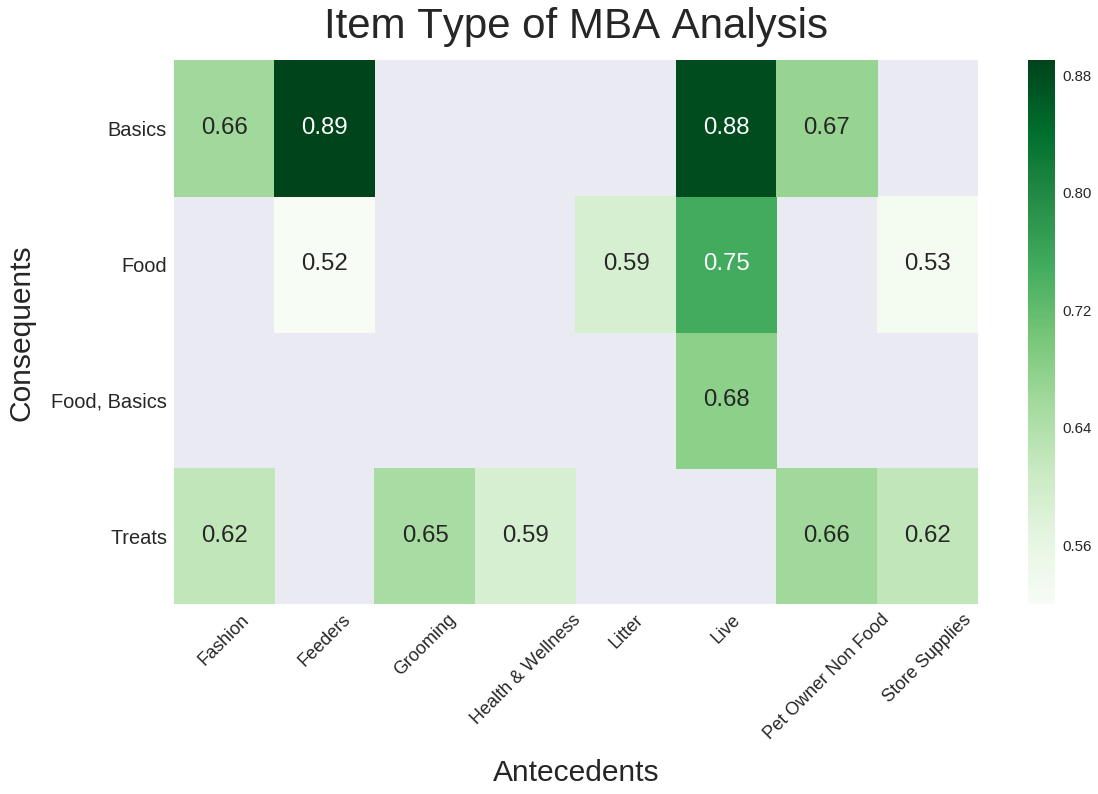

In [0]:
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_plot_type.reset_index().pivot(
    index = 'consequents', columns = 'antecedents', values = 'confidence'), annot = True,
            annot_kws = {"size": 24},  fmt = "g", cmap = 'Greens')
plt.title("Item Type of MBA Analysis",
          y = 1.03, 
          fontsize = 42)
plt.xlabel("Antecedents", 
           labelpad = 16, 
           fontsize = 30)
plt.ylabel("Consequents", 
           labelpad = 16, 
           fontsize = 30)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 20, rotation = 0); 

## ES

In [0]:
df_type2 = df_basket[['NeighborID','type','TotalSales']]
df_type2 = pd.get_dummies(df_type2, columns = ['type'])
df_type2.columns = F_Set3(df_type2.columns)
df_type2 = df_type2.iloc[:, 2:].apply(lambda x: (x * df_type2.TotalSales).sum()).to_frame().T

In [0]:
df_type2 = df_type2.T
df_type2 = df_type2.reset_index()
df_type2.columns = ['type','Sales']

In [0]:
df_plot_type_profits = df_plot_type.merge(df_type2, left_on='consequents', right_on='type', how='inner')

In [0]:
df_plot_type_profits['ES'] = df_plot_type_profits.confidence * df_plot_type_profits.Sales

In [0]:
df_plot_type_profits.groupby('antecedents').mean()['ES'].sum()

6974171.921295952

In [0]:
df_plot_type_profits.groupby('antecedents').mean().sort_values(by = 'ES', ascending = False)

,confidence,Sales,ES
antecedents,,,
Live,0.815,1.675212e+06,1.394076e+06
Feeders,0.705,1.675212e+06,1.262933e+06
Pet Owner Non Food,0.665,1.482490e+06,9.890331e+05
Fashion,0.640,1.482490e+06,9.615029e+05
Litter,0.590,1.232459e+06,7.271507e+05
Store Supplies,0.575,1.039737e+06,5.891764e+05
Grooming,0.650,8.470154e+05,5.505600e+05
Health & Wellness,0.590,8.470154e+05,4.997391e+05


In [0]:
df_basket.columns

Index(['Unnamed: 0', 'NeighborID', 'TransactionID', 'TransDate', 'ItemID',
       'one', 'brand', 'category', 'type', 'five', 'six', 'Quantity', 'Price',
       'TotalSales', 'Discount', 'Cost', 'Freq_DM', 'DM_Blast_Email',
       'DM_Targeted_Direct_mail', 'Freq_Email', 'Profits'],
      dtype='object')

In [0]:
df_basket['Price'].sum()

4896624.388333334

## Same Time: Type

In [0]:
df_type_S = df_basket[['TransactionID','type']]
df_type_S = pd.get_dummies(df_type_S, columns = ['type'])
df_type_S = df_type_S.groupby(['TransactionID']).sum()
df_type_S = df_type_S.applymap(encode_units)
frequent_itemsets_type_S = apriori(df_type, 
                                   min_support = 0.001, 
                                   use_colnames = True)
rules_type_S = association_rules(frequent_itemsets_type_S, 
                                 metric = "lift", 
                                 min_threshold = 1)

In [0]:
rules_type2_S = rules_type_S[(rules_type_S['lift'] > 1) & (rules_type_S['confidence'] > 0.3) & 
            pd.Series(F_Set(rules_type_S['antecedents'])).isin(df_type_S.columns)]

In [0]:
df_plot_type_S = rules_type2_S[['antecedents', 'consequents', 'confidence']]

In [0]:
df_plot_type_S['antecedents'] = F_Set2(df_plot_type_S['antecedents'])
df_plot_type_S['consequents'] = F_Set2(df_plot_type_S['consequents'])
df_plot_type_S['confidence']  = round(df_plot_type_S['confidence'], 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

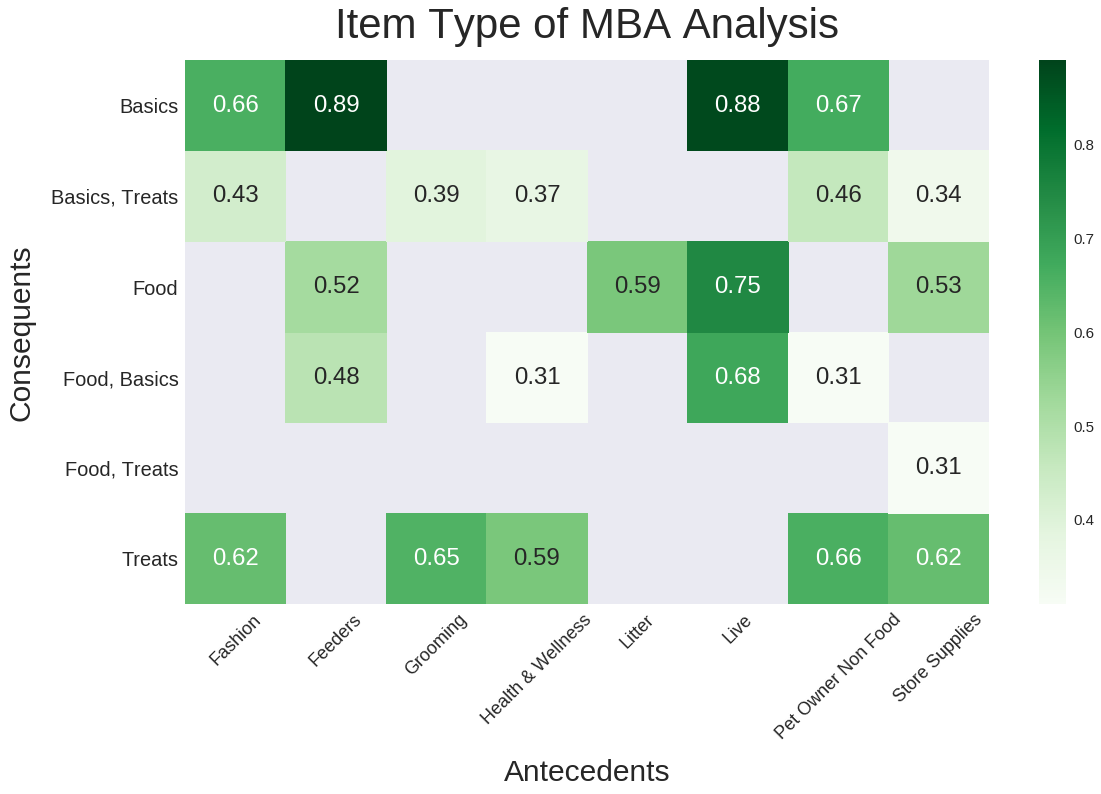

In [0]:
plt.figure(figsize = (18, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_plot_type_S.reset_index().pivot(
    index = 'consequents', columns = 'antecedents', values = 'confidence'), annot = True,
            annot_kws = {"size": 24},  fmt = "g", cmap = 'Greens')
plt.title("Item Type of MBA Analysis",
          y = 1.03, 
          fontsize = 42)
plt.xlabel("Antecedents", 
           labelpad = 16, 
           fontsize = 30)
plt.ylabel("Consequents", 
           labelpad = 16, 
           fontsize = 30)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 20, rotation = 0); 

#### Products

In [0]:
df_product = df_basket[['NeighborID','one']]
df_product = pd.get_dummies(df_product, columns = ['one'])
df_product = df_product.groupby(['NeighborID']).sum()
df_product = df_product.applymap(encode_units)
frequent_itemsets_one = apriori(df_product, 
                                   min_support = 0.001, 
                                   use_colnames = True)
rules_one = association_rules(frequent_itemsets_one, 
                                 metric = "lift", 
                                 min_threshold = 1)

In [0]:
result_one = rules_one[(rules_one['lift'] > 1) & (rules_one['confidence'] > 0.5)]
result_one